milestone p1

In [ ]:
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-d27d65ff-2935-6564-701a-84f556f5a9da)


In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
from helper_functions import *

--2023-02-17 17:07:32--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2023-02-17 17:07:33 (105 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds

In [ ]:
datasets_list=tfds.list_builders()
(train_data,test_data),ds_info=tfds.load(name="food101",
                                         split=["train","validation"],
                                         shuffle_files=True,
                                         as_supervised=True,
                                         with_info=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating train examples...:   0%|          | 0/75750 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/food101/2.0.0.incomplete9H8MDR/food101-train.tfrecord*...:   0%|          …

Generating validation examples...:   0%|          | 0/25250 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/food101/2.0.0.incomplete9H8MDR/food101-validation.tfrecord*...:   0%|     …

Dataset food101 downloaded and prepared to /root/tensorflow_datasets/food101/2.0.0. Subsequent calls will reuse this data.


In [ ]:
ds_info.features

FeaturesDict({
    'image': Image(shape=(None, None, 3), dtype=uint8),
    'label': ClassLabel(shape=(), dtype=int64, num_classes=101),
})

In [ ]:
ds_info

tfds.core.DatasetInfo(
    name='food101',
    full_name='food101/2.0.0',
    description="""
    This dataset consists of 101 food categories, with 101'000 images. For each class, 250 manually reviewed test images are provided as well as 750 training images. On purpose, the training images were not cleaned, and thus still contain some amount of noise. This comes mostly in the form of intense colors and sometimes wrong labels. All images were rescaled to have a maximum side length of 512 pixels.
    """,
    homepage='https://data.vision.ee.ethz.ch/cvl/datasets_extra/food-101/',
    data_path=PosixGPath('/tmp/tmp6xzq1trstfds'),
    file_format=tfrecord,
    download_size=4.65 GiB,
    dataset_size=4.77 GiB,
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=101),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'train': <SplitInfo num_exam

In [ ]:
class_names=ds_info.features["label"].names
print(class_names)

['apple_pie', 'baby_back_ribs', 'baklava', 'beef_carpaccio', 'beef_tartare', 'beet_salad', 'beignets', 'bibimbap', 'bread_pudding', 'breakfast_burrito', 'bruschetta', 'caesar_salad', 'cannoli', 'caprese_salad', 'carrot_cake', 'ceviche', 'cheesecake', 'cheese_plate', 'chicken_curry', 'chicken_quesadilla', 'chicken_wings', 'chocolate_cake', 'chocolate_mousse', 'churros', 'clam_chowder', 'club_sandwich', 'crab_cakes', 'creme_brulee', 'croque_madame', 'cup_cakes', 'deviled_eggs', 'donuts', 'dumplings', 'edamame', 'eggs_benedict', 'escargots', 'falafel', 'filet_mignon', 'fish_and_chips', 'foie_gras', 'french_fries', 'french_onion_soup', 'french_toast', 'fried_calamari', 'fried_rice', 'frozen_yogurt', 'garlic_bread', 'gnocchi', 'greek_salad', 'grilled_cheese_sandwich', 'grilled_salmon', 'guacamole', 'gyoza', 'hamburger', 'hot_and_sour_soup', 'hot_dog', 'huevos_rancheros', 'hummus', 'ice_cream', 'lasagna', 'lobster_bisque', 'lobster_roll_sandwich', 'macaroni_and_cheese', 'macarons', 'miso_sou

In [ ]:
train_one_sample=train_data.take(1)

In [ ]:
for image,label in train_one_sample:
  print(f"""
  Image shape:{image.shape}
  image datatype:{image.dtype}
  Target class from Food101Tensorform:{label}
  Class name9str form):{class_names[label.numpy()]}
  """)


  Image shape:(382, 512, 3)
  image datatype:<dtype: 'uint8'>
  Target class from Food101Tensorform:52
  Class name9str form):gyoza
  


In [ ]:
tf.reduce_min(image),tf.reduce_max(image)

(<tf.Tensor: shape=(), dtype=uint8, numpy=0>,
 <tf.Tensor: shape=(), dtype=uint8, numpy=255>)

In [ ]:
import matplotlib.pyplot as plt

(-0.5, 511.5, 381.5, -0.5)

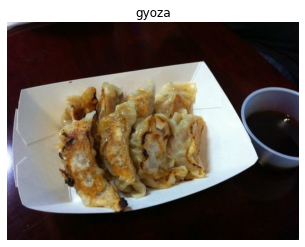

In [ ]:
plt.imshow(image)
plt.title(class_names[label.numpy()])
plt.axis(False)

In [ ]:
from tensorflow.python.ops.variables import local_variables_initializer
def preprocess_img(image, label, img_shape=224):
    """
    Converts image datatype from 'uint8' -> 'float32' and reshapes image to
    [img_shape, img_shape, color_channels]
    """
    image = tf.image.resize(image, [img_shape, img_shape]) # reshape to img_shape
    return tf.cast(image, tf.float32), label # return (float32_image, label) tuple

In [ ]:
# Preprocess a single sample image and check the outputs
preprocessed_img = preprocess_img(image, label)[0]
print(f"Image before preprocessing:\n {image[:2]}...,\nShape: {image.shape},\nDatatype: {image.dtype}\n")
print(f"Image after preprocessing:\n {preprocessed_img[:2]}...,\nShape: {preprocessed_img.shape},\nDatatype: {preprocessed_img.dtype}")


Image before preprocessing:
 [[[207 220 237]
  [207 220 237]
  [207 220 236]
  ...
  [ 10  11  13]
  [ 11  12  14]
  [ 12  13  15]]

 [[208 219 237]
  [207 220 236]
  [208 220 236]
  ...
  [  9  10  12]
  [ 10  11  13]
  [ 11  12  14]]]...,
Shape: (382, 512, 3),
Datatype: <dtype: 'uint8'>

Image after preprocessing:
 [[[207.12596  219.87404  236.77328 ]
  [206.75159  219.39891  235.39891 ]
  [206.33514  216.86098  232.36958 ]
  ...
  [ 10.433058  11.433058  13.433058]
  [  9.974804  10.974804  12.974804]
  [ 11.004499  12.004499  14.004499]]

 [[214.51498  225.25287  240.26627 ]
  [214.24043  223.17825  238.07462 ]
  [213.40561  221.28954  234.25638 ]
  ...
  [ 12.571472  13.571472  15.571472]
  [ 11.928558  12.928558  14.928558]
  [ 11.941964  12.941964  14.941964]]]...,
Shape: (224, 224, 3),
Datatype: <dtype: 'float32'>


In [ ]:
train_data=train_data.map(map_func=preprocess_img,num_parallel_calls=tf.data.AUTOTUNE)
#SHUFFLE TRAIN DATA


In [ ]:
train_data=train_data.shuffle(buffer_size=1000).batch(batch_size=32).prefetch(buffer_size=tf.data.AUTOTUNE)
test_data=test_data.map(preprocess_img,num_parallel_calls=tf.data.AUTOTUNE).batch(32).prefetch(tf.data.AUTOTUNE)

In [ ]:
train_data,test_data

(<PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>,
 <PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>)

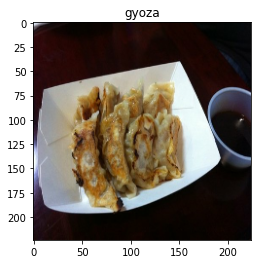

In [ ]:
plt.imshow(preprocessed_img/255.)
plt.title(class_names[label])
plt.show()

In [ ]:
checkpoint_path="model_checkpoint/cp.ckpt"
model_checkpoint=tf.keras.callbacks.ModelCheckpoint(checkpoint_path,
                                                    monitor="val_acc",
                                                    save_best_onlt=True,
                                                    save_weights_only=True,
                                                    verbose=0)

In [ ]:
from tensorflow.keras import mixed_precision
mixed_precision.set_global_policy("mixed_float16")

In [ ]:
mixed_precision.global_policy

<function keras.mixed_precision.policy.global_policy()>

In [ ]:
from tensorflow.keras import layers
input_shape=(224,224,3)
base_model=tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable=False

inputs=layers.Input(shape=input_shape,name="input_layer")
x=base_model(inputs,training=False)
x=layers.GlobalAveragePooling2D()(x)
x=layers.Dense(len(class_names))(x)
outputs=layers.Activation("softmax",dtype=tf.float32,name="softmax_float32")(x)
model=tf.keras.Model(inputs,outputs)

model.compile(loss="sparse_categorical_crossentropy", # Use sparse_categorical_crossentropy when labels are *not* one-hot
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

16705208/16705208 [==============================] - 2s 0us/step


In [ ]:
for layer in model.layers:
  print(layer.name,layer.trainable,layer.dtype,layer.dtype_policy)

input_layer True float32 <Policy "float32">
efficientnetb0 False float32 <Policy "mixed_float16">
global_average_pooling2d True float32 <Policy "mixed_float16">
dense True float32 <Policy "mixed_float16">
softmax_float32 True float32 <Policy "float32">


In [ ]:
for layer in model.layers[1].layers:
  print(layer.name,layer.trainable,layer.dtype,layer.dtype_policy)

input_1 False float32 <Policy "float32">
rescaling False float32 <Policy "mixed_float16">
normalization False float32 <Policy "mixed_float16">
rescaling_1 False float32 <Policy "mixed_float16">
stem_conv_pad False float32 <Policy "mixed_float16">
stem_conv False float32 <Policy "mixed_float16">
stem_bn False float32 <Policy "mixed_float16">
stem_activation False float32 <Policy "mixed_float16">
block1a_dwconv False float32 <Policy "mixed_float16">
block1a_bn False float32 <Policy "mixed_float16">
block1a_activation False float32 <Policy "mixed_float16">
block1a_se_squeeze False float32 <Policy "mixed_float16">
block1a_se_reshape False float32 <Policy "mixed_float16">
block1a_se_reduce False float32 <Policy "mixed_float16">
block1a_se_expand False float32 <Policy "mixed_float16">
block1a_se_excite False float32 <Policy "mixed_float16">
block1a_project_conv False float32 <Policy "mixed_float16">
block1a_project_bn False float32 <Policy "mixed_float16">
block2a_expand_conv False float32 <

In [ ]:
history_1=model.fit(train_data,
                    epochs=3,
                    steps_per_epoch=len(train_data),
                    validation_data=test_data,
                    validation_steps=int(len(test_data)*0.15),
                    callbacks=[create_tensorboard_callback(dir_name="training_logs",
                                                           experiment_name="efficientb0_101"),model_checkpoint])

Saving TensorBoard log files to: training_logs/efficientb0_101/20230217-172350


Epoch 1/3
2368/2368 [==============================] - 192s 74ms/step - loss: 1.7170 - accuracy: 0.5832 - val_loss: 1.1295 - val_accuracy: 0.6976
Epoch 2/3
2368/2368 [==============================] - 173s 72ms/step - loss: 1.1987 - accuracy: 0.6891 - val_loss: 1.0328 - val_accuracy: 0.7177
Epoch 3/3
2368/2368 [==============================] - 179s 74ms/step - loss: 1.0531 - accuracy: 0.7251 - val_loss: 0.9968 - val_accuracy: 0.7256


In [ ]:
results_feature_extract=model.evaluate(test_data)
results_feature_extract

790/790 [==============================] - 52s 65ms/step - loss: 1.0013 - accuracy: 0.7267


[1.0012989044189453, 0.7266534566879272]

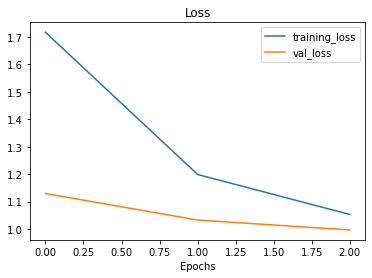

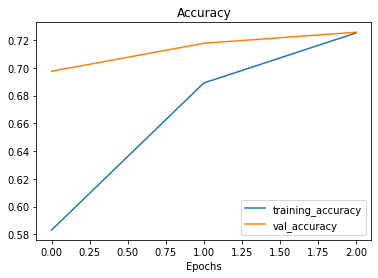

In [ ]:
plot_loss_curves(history_1)

In [ ]:
base_model.trainable=True

for layer in base_model.layers[:-10]:
  layer.trainable=False

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(lr=0.0001),
              metrics=["accuracy"])

In [ ]:
train_data


<PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

In [ ]:
fine_tune_epochs=10

history_2=model.fit( train_data,
                    epochs=fine_tune_epochs,
                    steps_per_epoch=len(train_data),
                    validation_data=test_data,
                    validation_steps=int(0.25*len(test_data)),
                   initial_epoch=history_1.epoch[-1],
                              callbacks=[create_tensorboard_callback(dir_name="transfer_learning",
                                                                     experiment_name="10_percent_fine_tune last 10")])


Saving TensorBoard log files to: transfer_learning/10_percent_fine_tune last 10/20230217-175453
Epoch 3/10
2368/2368 [==============================] - 199s 79ms/step - loss: 1.1870 - accuracy: 0.6843 - val_loss: 0.9845 - val_accuracy: 0.7318
Epoch 4/10
2368/2368 [==============================] - 183s 77ms/step - loss: 0.8629 - accuracy: 0.7634 - val_loss: 0.9642 - val_accuracy: 0.7397
Epoch 5/10
2368/2368 [==============================] - 183s 76ms/step - loss: 0.6549 - accuracy: 0.8130 - val_loss: 0.9810 - val_accuracy: 0.7354
Epoch 6/10
2368/2368 [==============================] - 190s 79ms/step - loss: 0.4903 - accuracy: 0.8551 - val_loss: 1.0346 - val_accuracy: 0.7351
Epoch 7/10
2368/2368 [==============================] - 196s 82ms/step - loss: 0.3757 - accuracy: 0.8849 - val_loss: 1.1314 - val_accuracy: 0.7349
Epoch 8/10
2368/2368 [==============================] - 190s 80ms/step - loss: 0.2914 - accuracy: 0.9082 - val_loss: 1.2211 - val_accuracy: 0.7306
Epoch 9/10
2368/2368 [

In [ ]:
result_finetune=model.evaluate(test_data)

790/790 [==============================] - 52s 66ms/step - loss: 1.4354 - accuracy: 0.7156


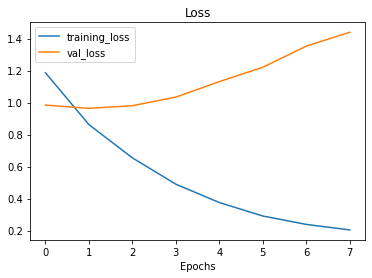

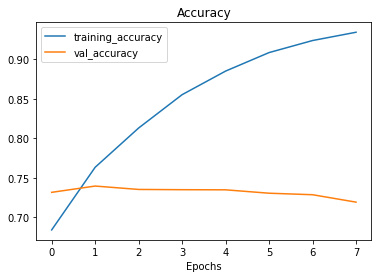

In [ ]:
plot_loss_curves(history_2)

In [ ]:
from keras import layers
from tensorflow.keras.layers.experimental import preprocessing
import tensorflow.keras as keras
data_augmentation=keras.Sequential([
    preprocessing.RandomFlip("horizontal"),
    preprocessing.RandomRotation(0.2),
    preprocessing.RandomZoom(0.2),
    preprocessing.RandomHeight(0.2),
    preprocessing.RandomWidth(0.2),
    preprocessing.RandomZoom(0.2)
],name="data_augmentation")

In [ ]:
input_shape=(224,224,3)
base_model1=tf.keras.applications.EfficientNetB0(include_top=False)
base_model1.trainable=False

inputs=layers.Input(shape=input_shape,name="input_layer")
x=data_augmentation(inputs)
x=base_model(x,training=False)
x=layers.GlobalAveragePooling2D()(x)
outputs=layers.Dense(10,activation="softmax",name="output_layer")(x)

model_2=tf.keras.Model(inputs,outputs)

In [ ]:
base_model1.trainable=True

for layer in base_model1.layers[:-10]:
  layer.trainable=False
model_2.compile(loss="sparse_categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(lr=0.0001),
              metrics=["accuracy"])


In [ ]:
history_3=model_2.fit(train_data,
                    epochs=8,
                    steps_per_epoch=len(train_data),
                    validation_data=test_data,
                    validation_steps=int(len(test_data)*0.15),
                    callbacks=[create_tensorboard_callback(dir_name="training_logs",
                                                           experiment_name="efficientb0_101"),model_checkpoint])

Saving TensorBoard log files to: training_logs/efficientb0_101/20230217-182156
Epoch 1/8


2368/2368 [==============================] - 713s 295ms/step - loss: nan - accuracy: 0.0129 - val_loss: nan - val_accuracy: 0.0172
Epoch 2/8
 928/2368 [==========>...................] - ETA: 7:00 - loss: nan - accuracy: 0.0121

In [ ]:
result_finetune=model_2.evaluate(test_data)

In [ ]:
plot_loss_curves(history_2)